In [ ]:
import os
import pickle
from datetime import datetime

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from P02_MSIE.T10_2_exp.vrptw_v11 import VRPTW

CURRENT_DIR = os.getcwd()
print(f"Current Directory: {CURRENT_DIR}")
datetime_now = datetime.now().strftime("%Y%m%d_%H%M%S")
os.makedirs(f"{CURRENT_DIR}/_tmp", exist_ok=True)


Current Directory: c:\Users\admin\Coding\research\rl-meta-test\src\P02_MSIE\T09_exp


In [12]:
folder = "R_20251113_213604"
it = 34586

In [13]:
with open(f"./save_models/{folder}/exp_{it:05d}.pkl", "rb") as f:
    exp = pickle.load(f)
exp.tail()

,action,reward,done,F,CR,MG,best_solution,convergence_rate,std_pop,total_iteration,best_trial_fitness,std_trial_fitness,patience_ratio,idx_iteration,patience_remaining,TimeLimit.truncated
275,"[0.3522310065442324, 0.07494546174705029, 0.99...",1.453386e-06,False,0.352231,0.074945,0.994381,0.465447,1.0,0.409572,2.76,0.644881,0.362667,0.125,2759,50,False
276,"[0.8662605546700954, 0.024386327412724496, 0.3...",8.815231e-07,False,0.866261,0.024386,0.343197,0.465447,1.0,0.441288,2.77,0.610129,0.405802,0.100,2769,40,False
277,"[0.5247121894872189, 0.05062781452029944, 0.96...",5.346708e-07,False,0.524712,0.050628,0.965444,0.465447,1.0,0.423534,2.78,0.615840,0.378062,0.075,2779,30,False
278,"[0.8765743200540542, 0.02465108859717846, 0.40...",3.242942e-07,False,0.876574,0.024651,0.400173,0.465447,1.0,0.429707,2.79,0.523241,0.419871,0.050,2789,20,False
279,"[0.6217957408893108, 0.025009428138136863, 0.9...",1.966944e-07,False,0.621796,0.025009,0.937203,0.465447,1.0,0.364067,2.80,0.604423,0.305910,0.025,2799,10,False


In [14]:
with open(f"./save_models/{folder}/vrp_{it:05d}.pkl", "rb") as f:
    info = pickle.load(f)

global_solution_history = info["global_solution_history"]
population = info["population"]
fitness_trial_history = info["fitness_trial_history"]
vrptw = info["vrptw"]
episode_reward = info["episode_reward"]
episode_length = info["episode_length"]
best_solution = info["best_solution"]
print(f"Episode Reward: {episode_reward}, Episode Length: {episode_length}, Best Solution: {best_solution}")

Episode Reward: 1081.245068, Episode Length: 281, Best Solution: 0.46544721474167033


Best global solution: 0.46544721474167033


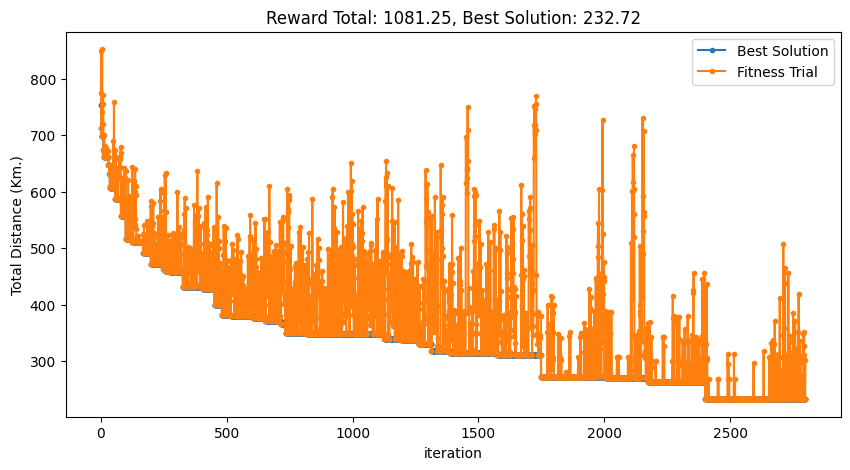

In [15]:
print(f"Best global solution: {min(global_solution_history)}")
# Plot results
fig, ax = plt.subplots(1, figsize=(10, 5))
x = np.arange(len(global_solution_history))
y1 = np.array(global_solution_history) * vrptw.solution_scale_factor
y2 = np.array(fitness_trial_history) * vrptw.solution_scale_factor
ax.plot(x, y1, marker=".", label="Best Solution")
ax.plot(x, y2, marker=".", label="Fitness Trial")
ax.set(
    xlabel="iteration",
    ylabel="Total Distance (Km.)",
    title=f"Reward Total: {episode_reward:.2f}, Best Solution: {best_solution*vrptw.solution_scale_factor:.2f}",
)
ax.legend()
fig.savefig(f"{CURRENT_DIR}/_tmp/plot_{datetime_now}_{it:05d}.png",
    dpi=300,
)


In [16]:
current_cost = [vrptw.objective_func(p) for p in population]
idx_min = np.argmin(current_cost)
print(current_cost[idx_min])

232.72360737083517


[0.50369861 0.08719329 0.01180275 0.08087462 0.70414424 0.86386483
 0.73380336 0.733839   0.79324075 0.76408076 0.78350367 0.48413228
 0.12843212 0.48282761 0.46392457 0.47033888 0.24535577 0.35689161
 0.39245587 0.55761789 0.67366081 0.64257695 0.62299986 0.60773028
 0.62008494 0.58018575 0.6419171  0.82608662 0.84369533 0.94276053
 0.26714116 0.68538872 0.63840237 0.39217874 1.         0.76462787
 0.68375802 0.46648868 0.2903476  0.37217975 0.32478988 0.28373446
 0.56615504 0.47393336 0.15465599 0.         0.487033   0.4587994
 0.54145525 0.59178383]


<Axes: >

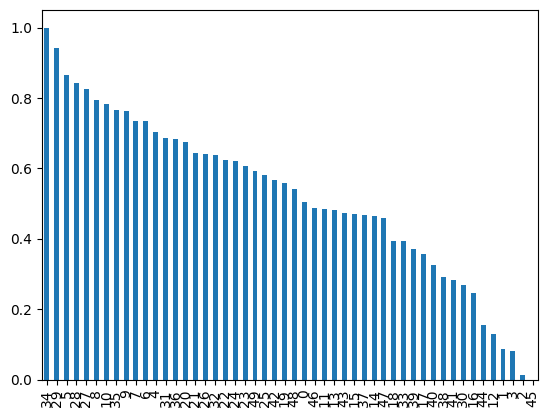

In [17]:
# How to visualize population
best_individual = population[idx_min]
print(best_individual)
pd.Series(best_individual).sort_values(ascending=False).plot.bar()

In [18]:
vrptw.objective_func(population[idx_min])

232.72360737083517

In [19]:
exp.columns

Index(['action', 'reward', 'done', 'F', 'CR', 'MG', 'best_solution',
       'convergence_rate', 'std_pop', 'total_iteration', 'best_trial_fitness',
       'std_trial_fitness', 'patience_ratio', 'idx_iteration',
       'patience_remaining', 'TimeLimit.truncated'],
      dtype='object')

<Axes: >

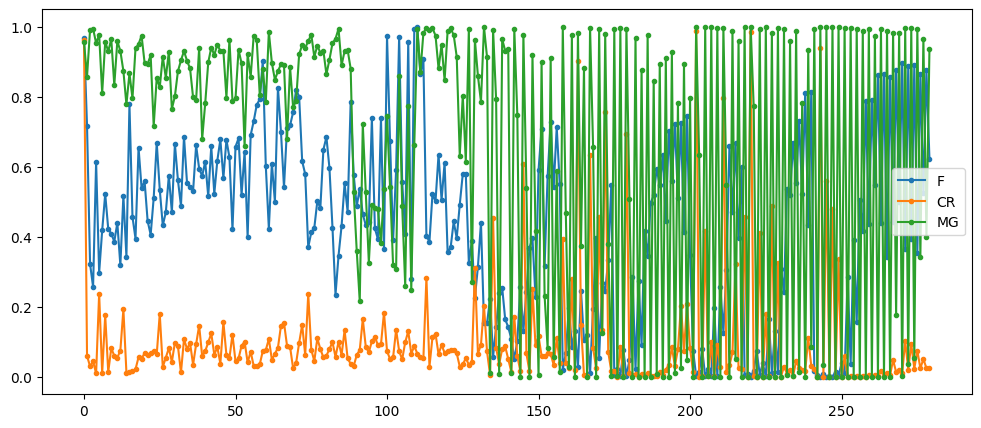

In [20]:
exp[["F", "CR", "MG"]].plot(figsize=(12,5), marker=".")